In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [23]:
import sys
!{sys.executable} -m pip install wordcloud

    100% |████████████████████████████████| 163kB 1.7MB/s ta 0:00:01
You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
print(sns.__version__)

0.9.0


In [12]:
#!conda install -y -c anaconda seaborn=0.9.0

Solving environment: | 
  - https://repo.continuum.io/pkgs/main/osx-64/contextlib2-0.5.5-py36hd66e5e7_0.tar.bz2/osx-64::contextlib2-0.5.5-py36hd66e5e7_0, https://repo.continuum.io/pkgs/main/osx-64/get_terminal_size-1.0.0-h7520d66_0.tar.bz2/osx-64::get_terminal_size-1.0.0-h7520d66_0, https://repo.continuum.io/pkgs/main/osx-64/jbig-2.1-h4d881f8_0.tar.bz2/osx-64::jbig-2.1-h4d881f8_0, https://repo.continuum.io/pkgs/main/osx-64/yaml-0.1.7-hc338f04_2.tar.bz2/osx-64::yaml-0.1.7-hc338f04_2
  - defaults/osx-64::jbig-2.1-h4d881f8_0, https://repo.continuum.io/pkgs/main/osx-64/contextlib2-0.5.5-py36hd66e5e7_0.tar.bz2/osx-64::contextlib2-0.5.5-py36hd66e5e7_0, https://repo.continuum.io/pkgs/main/osx-64/get_terminal_size-1.0.0-h7520d66_0.tar.bz2/osx-64::get_terminal_size-1.0.0-h7520d66_0, https://repo.continuum.io/pkgs/main/osx-64/yaml-0.1.7-hc338f04_2.tar.bz2/osx-64::yaml-0.1.7-hc338f04_2
  - defaults/osx-64::yaml-0.1.7-hc338f04_2, https://repo.continuum.io/pkgs/main/osx-64/contextlib2-0.5.5-py36hd6

In [3]:
data = pd.read_csv("./input/top10s.csv",encoding='ISO-8859-1')

In [4]:
data.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [7]:
data.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [8]:
data.rename(columns = {'top genre': 'top_genre', 'bpm': 'beats_per_minute', 'nrgy': 'energy', 
                       'dnce': 'danceability', 'dB': 'loudness(dB)', 'live': 'liveness', 
                       'val': 'valence', 'dur': 'length', 'acous': 'acousticness', 
                       'spch': 'speechiness', 'pop': 'popularity'}, inplace=True)

In [9]:
data.dtypes

title               object
artist              object
top_genre           object
year                 int64
beats_per_minute     int64
energy               int64
danceability         int64
loudness(dB)         int64
liveness             int64
valence              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object

# Numerical features

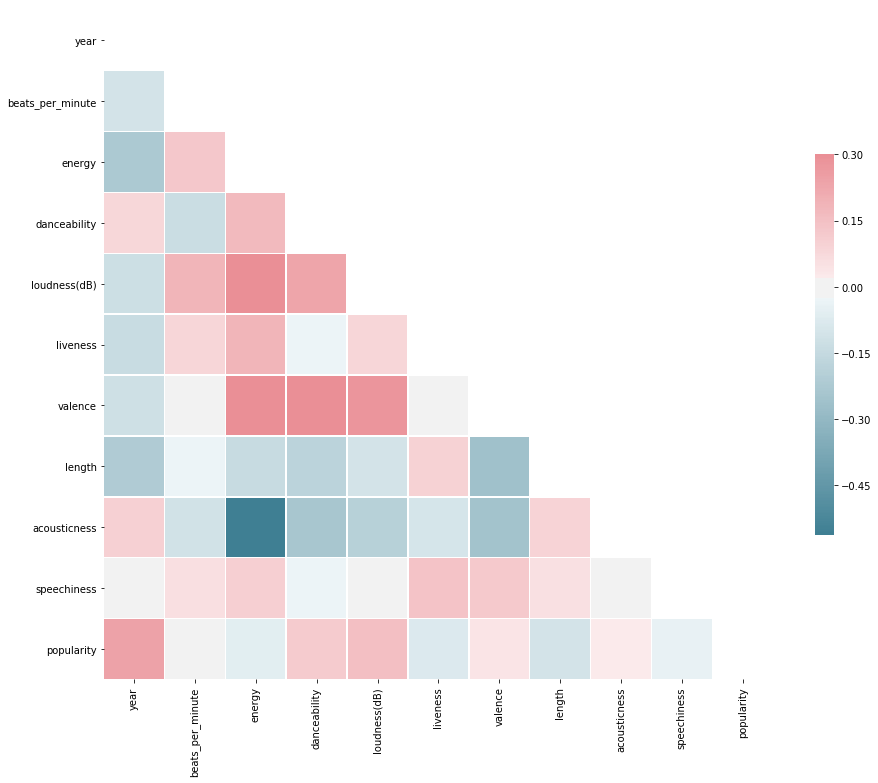

In [10]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

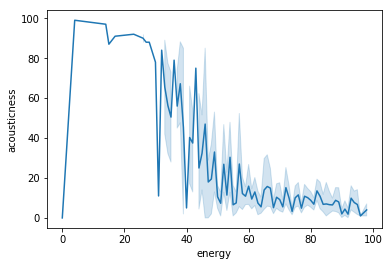

In [11]:
sns.lineplot(x="energy", y="acousticness", data=data)

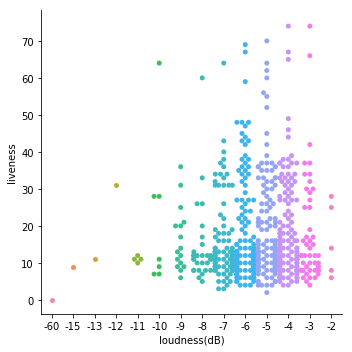

In [13]:
sns.catplot(y="liveness", x="loudness(dB)", kind="swarm", data=data)

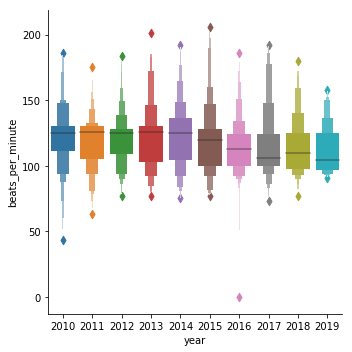

In [14]:
sns.catplot(y="beats_per_minute", x="year", kind="boxen", data=data)

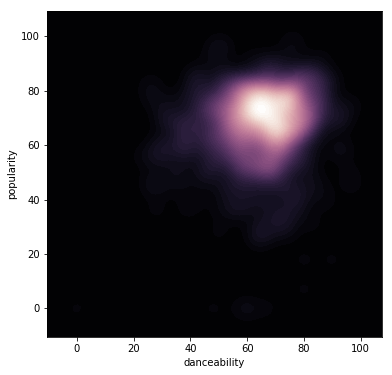

In [15]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(data.danceability, data.popularity, cmap=cmap, n_levels=60, shade=True);

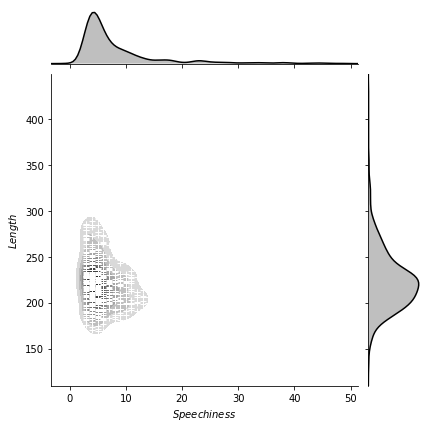

In [16]:
g = sns.jointplot(x=data.speechiness, y=data.length, data=data, kind="kde", color="k")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Speechiness$", "$Length$")

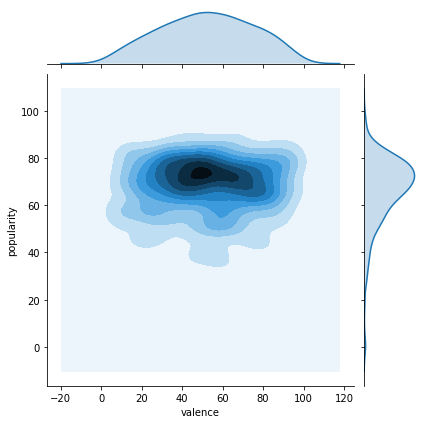

In [17]:
sns.jointplot(x=data.valence, y=data.popularity, data=data, kind="kde")

# Categorical features

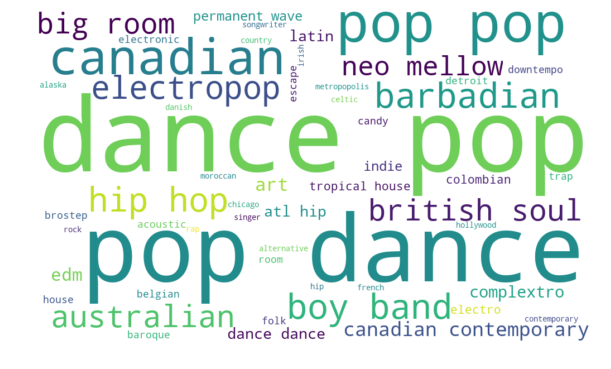

In [25]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 150,
                      background_color='white').generate(" ".join(data.top_genre))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top 10 genre based on song in percentage')

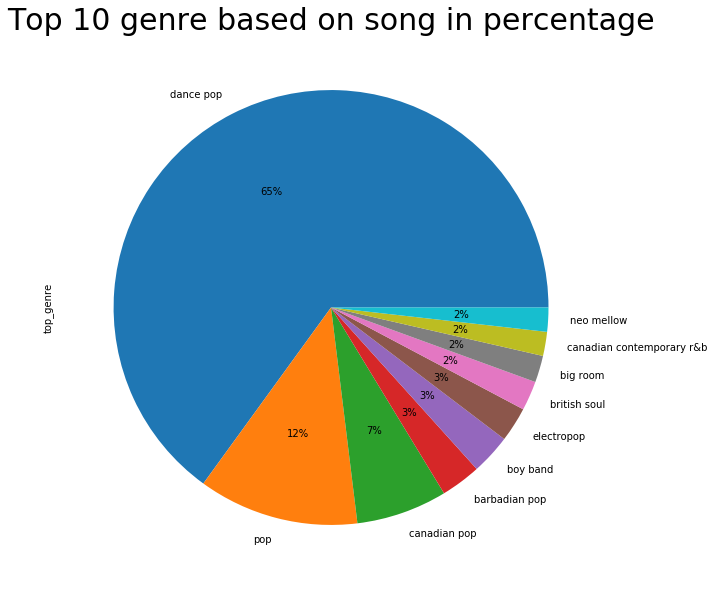

In [31]:
data['top_genre'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%')
plt.title('Top 10 genre based on song in percentage',fontsize=30)

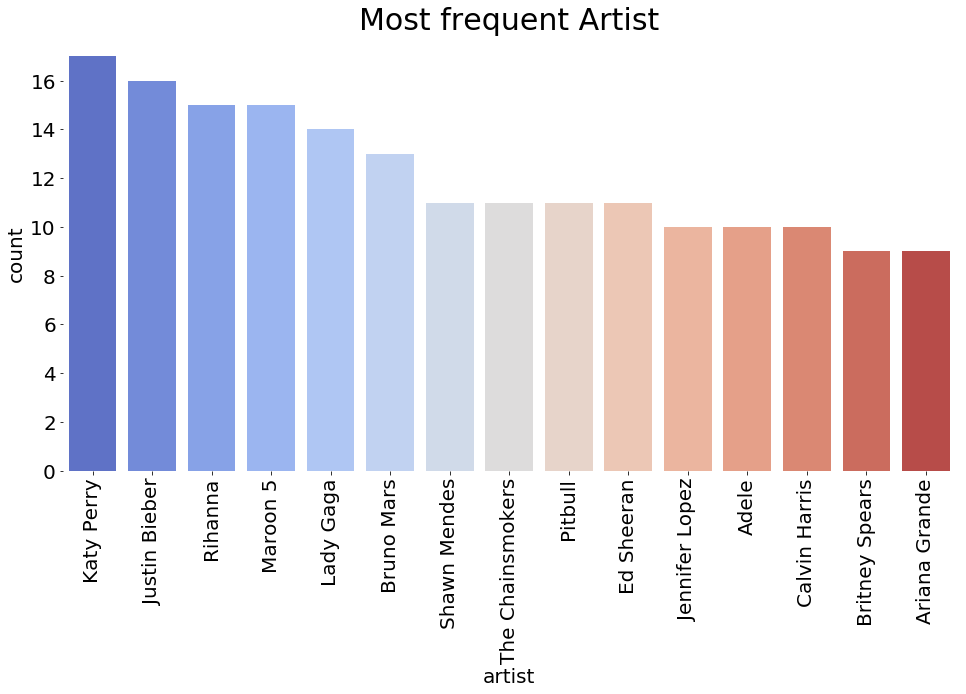

In [27]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Artist',fontsize=30)
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.countplot(data.artist,order=pd.value_counts(data.artist).iloc[:15].index,palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

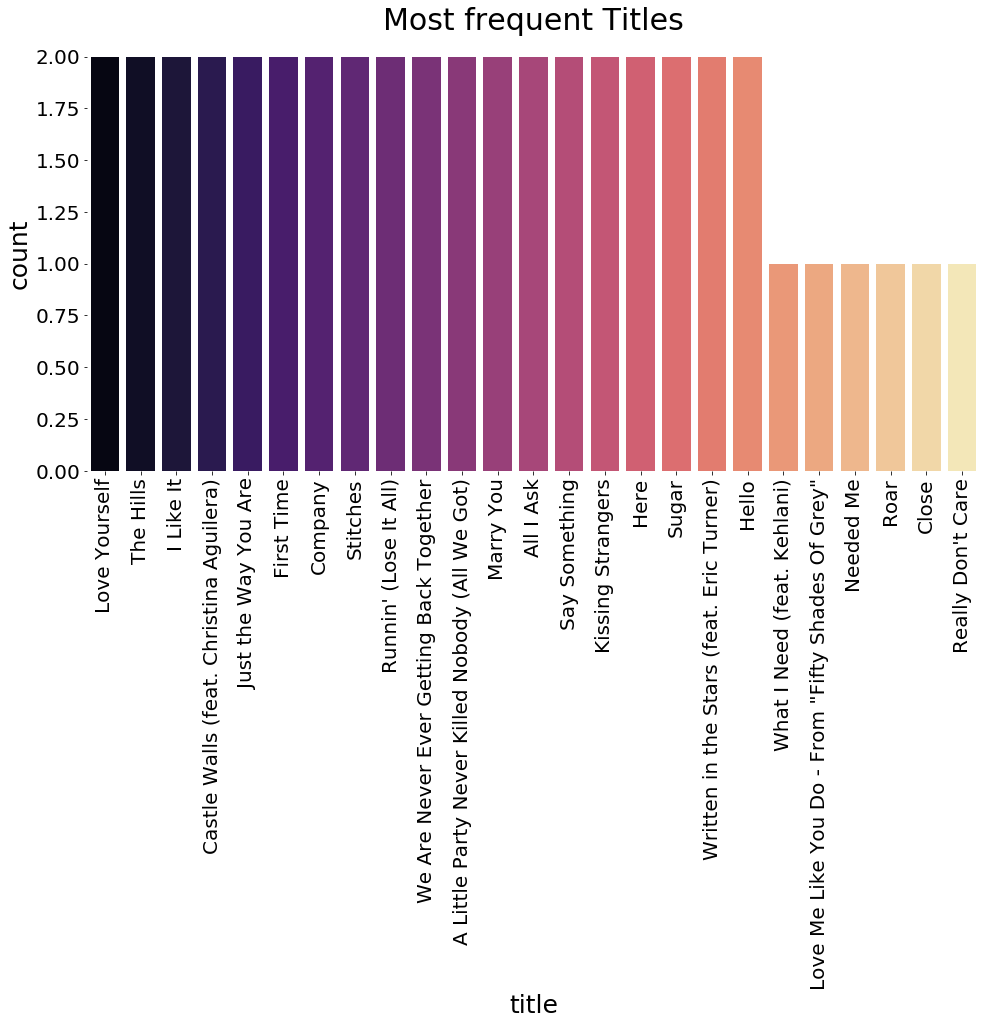

In [28]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Titles',fontsize=30)
plt.xlabel('Title', fontsize=25)
plt.ylabel('Count', fontsize=25)

sns.countplot(data.title,order=pd.value_counts(data.title).iloc[:25].index,palette=sns.color_palette("magma", 25))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show

Text(0.5, 1.0, 'Top 10 artist based on song in percentage')

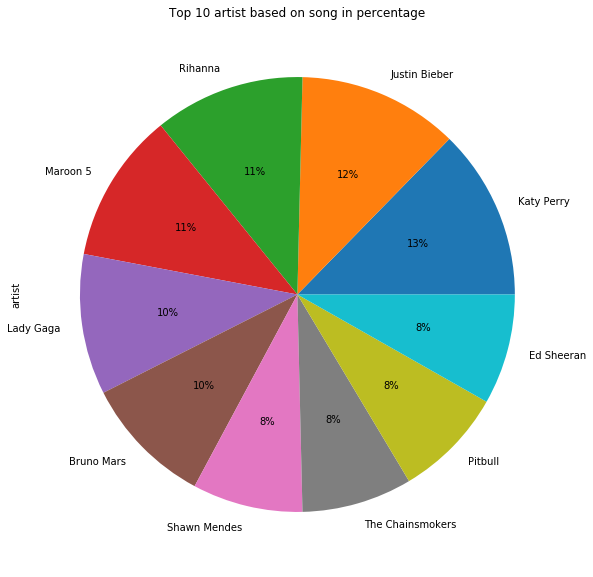

In [29]:
data['artist'].value_counts().head(10).plot.pie(figsize=(10,10), autopct='%1.0f%%')
plt.title('Top 10 artist based on song in percentage')